# A simple parser for LTspice files

**Scott Prahl**

Dec 2025

This notebook shows a how some simple LTspice `.asc` circuit files may be converted to a simple netlist for use with the `lcapy` circuit analysis package.

In [2]:
import lcapy

# from ltparser import ltparser
import ltparser

# make matplotlib hires
%config InlineBackend.figure_format='retina'

## Simple Voltage Source and Resistor

Open an LTspice file and convert to a simple netlist.

<img src="images/simple1.png" width=20%>

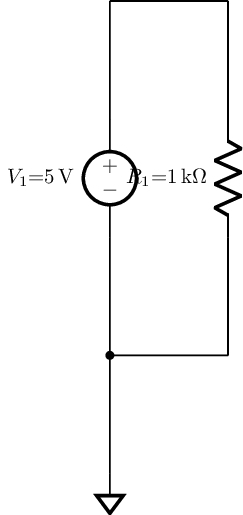

In [2]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple1.asc")
# lt.parse()
# lt.make_netlist(renumber_nodes=False)
# print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

In [3]:
lt.read("../tests/examples/simple1.asc")
lt.parse()
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)

W 2 1; right
W 2 3; down
W 1 4; down
W 6 5; down
W 8 7; down
W 5 7; right
W 5 0; down
V1 3 6 5; down
R1 4 8 1000.0; down



The primary reason for this netlist is to allow us to use the `lcapy` package to draw the circuit and do some analysis.  Here we create a `lcapy.Circuit()` object and use that to draw the circuit.  The default settings are  not perfect, but allow us to directly visualize the circuit.

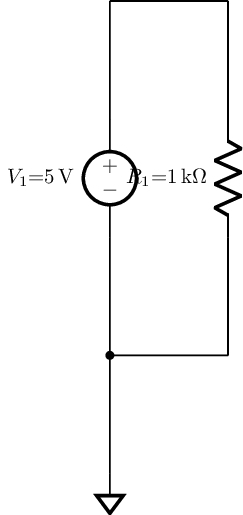

In [4]:
cct = lt.circuit()
cct.draw(scale=0.5)

Since we have the netlist, we can copy-and-paste the netlist to allow us to change the horizontal size and add a ground symbol.

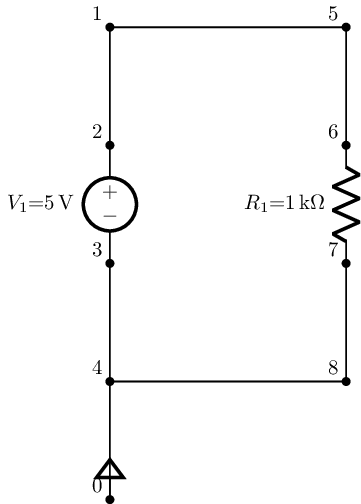

In [5]:
cct = lcapy.Circuit()
cct.add(
    """
W 5 1; left=2
W 2 1; up
W 6 5; up
W 4 3; up
W 8 7; up
W 8 4; left
W 0 4; up
V1 2 3 5.0; down
R1 6 7 1000.0; down
;autoground=True
"""
)
cct.draw(scale=0.5)

## An even simpler circuit

W 2 1; right
W 4 3; right
W 4 0; down
V1 2 4 3.3; down
R1 1 3 4700000.0; down



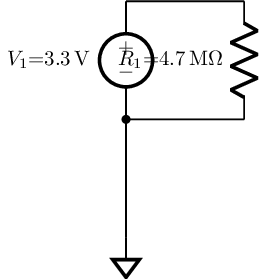

In [6]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple0.asc")
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

W 1 2; right
W 3 4; right
W 3 0; down
V1 1 3 3.3; down
R1 2 4 4700000.0; down



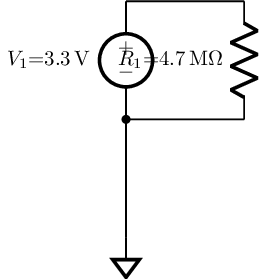

In [7]:
lt.read("../tests/examples/simple0.asc")
lt.single_ground = False
lt.make_netlist()
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

## A circuit with multiple ground symbols

W 2 1; right
W 2 3; down
W 1 4; down
V1 3 0_1 5; down
R1 4 0_2 1000.0; down



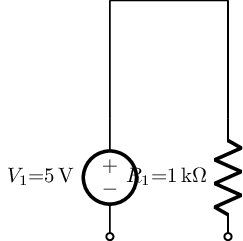

In [4]:
lt = ltparser.LTspice()
lt.read("../tests/examples/simple2.asc")

# print("Original")
lt.make_netlist(renumber_nodes=False)
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

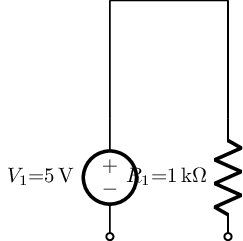

In [19]:
## print("Renumbered")
lt.read("../tests/examples/simple2.asc")
# lt.make_netlist(renumber_nodes=True)
# print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

## A resonant series circuit

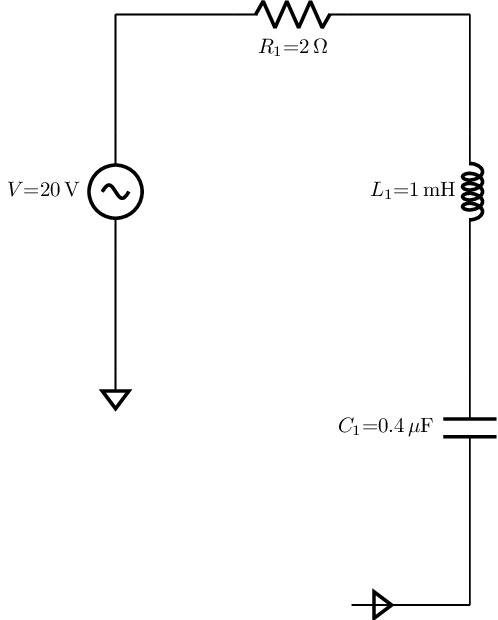

In [22]:
lt = ltparser.LTspice()
lt.read("../tests/examples/resonant-series.asc")
# lt.make_netlist()
# print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that voltage elements are oriented correctly

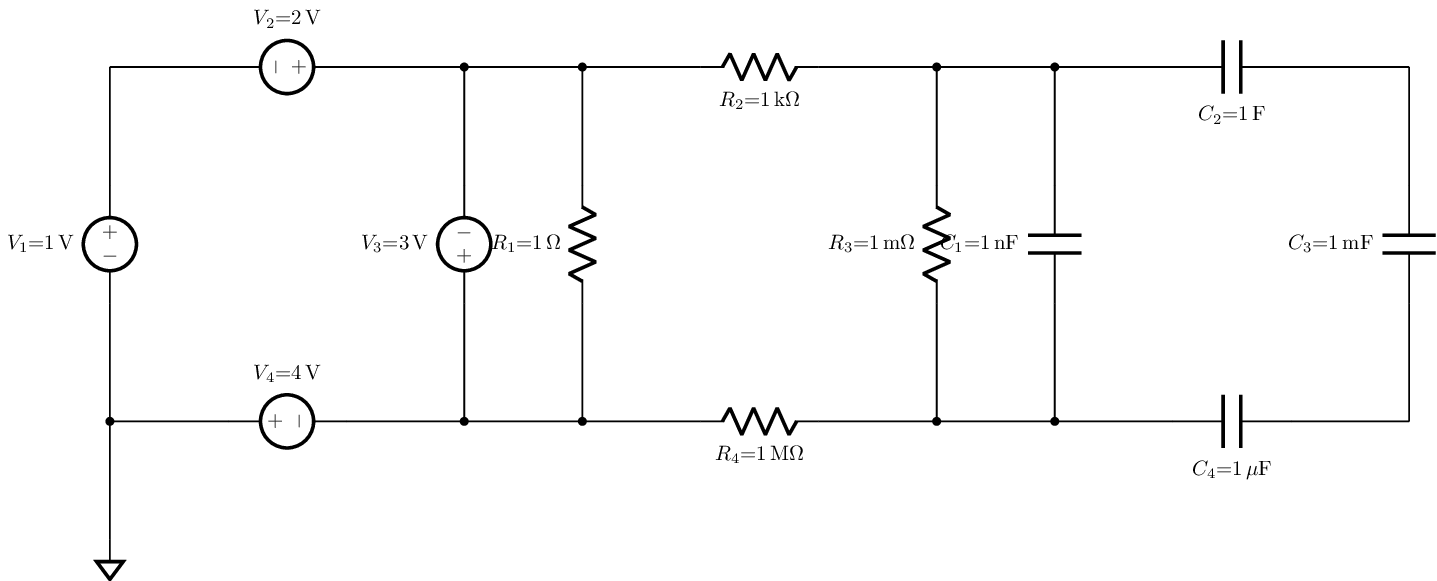

In [23]:
lt = ltparser.LTspice()
lt.read("../tests/examples/orientation-test.asc")
# lt.make_netlist()
# print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that current elements are oriented correctly

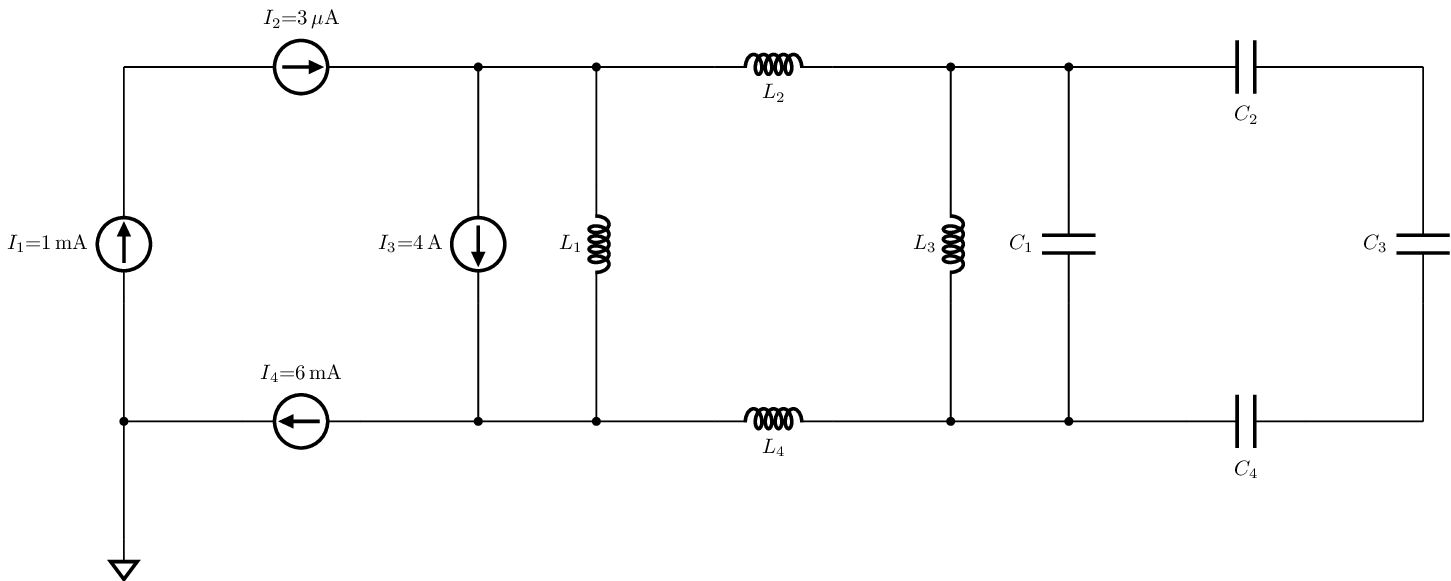

In [24]:
lt = ltparser.LTspice()
lt.read("../tests/examples/orientation-test2.asc")
# lt.make_netlist()
# print(lt.netlist)

cct = lt.circuit()
cct.draw(scale=0.5)

## Twin-T filter

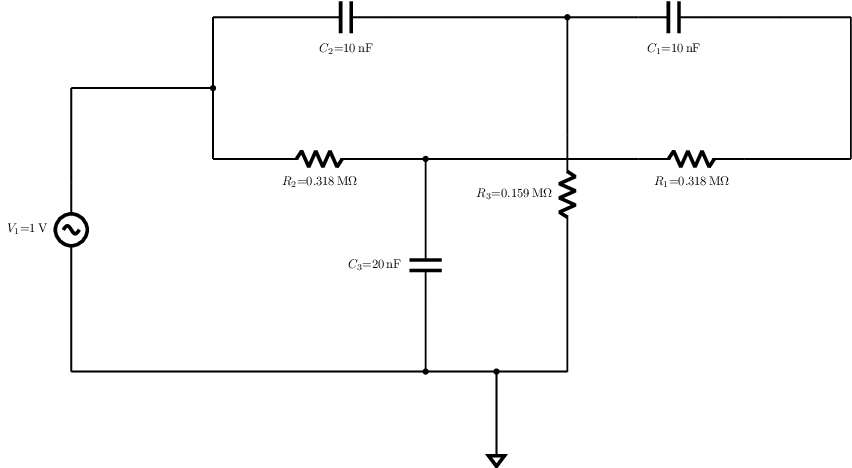

In [27]:
lt = ltparser.LTspice()
lt.read("../tests/examples/twin-t.asc")
# lt.make_netlist()
# print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.3)

## Passive crossover circuit

This one has 'µ' in as part of labels.

W 1 2; right
W 2 3; right
W 3 4; right
W 4 5; right
W 2 6; down
W 3 7; down
W 4 8; down
W 5 9; down
W 10 11; down
W 12 13; down
W 1 14; down
W 15 16; down
W 17 18; down
W 19 20; down
W 21 22; down
W 16 23; down
W 22 24; down
W 18 25; down
W 20 26; down
W 27 28; down
W 29 30; down
W 28 30; right
W 31 32; down
W 30 32; right
W 33 34; down
W 32 34; right
W 35 36; down
W 34 36; right
W 36 0; down
V1 14 27 ac 1.000000; down
C1 6 10 0.00066; down
C2 7 12 0.00066; down
C3 8 17 3.7e-06; down
C4 9 19 6.5999999999999995e-06; down
R1 23 29 4.0; down
R2 24 31 4.0; down
R3 25 33 4.0; down
R4 26 35 4.0; down
L1 11 15 1.9999999999999998e-05; down
L2 13 21 3.9999999999999996e-05; down

{'0832_0640': 0, '0176_0384': 16, '0400_0400': 22, '0624_0384': 18, '0832_0384': 20, '0176_0064': 2, '-128_0064': 1, '0400_0064': 3, '0624_0064': 4, '0832_0064': 5, '0176_0128': 6, '0400_0128': 7, '0624_0128': 8, '0832_0128': 9, '0176_0272': 11, '0176_0192': 10, '0400_0272': 13, '0400_0192': 12, '-128_0304': 14, '0176_0

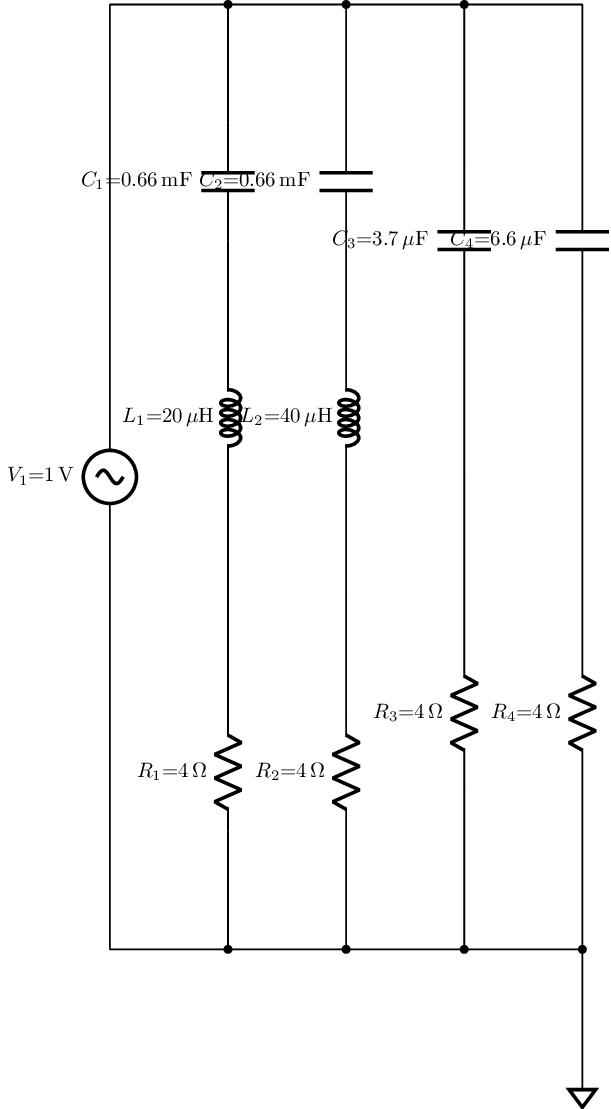

In [15]:
lt = ltparser.LTspice()
lt.read("../tests/examples/passive-crossover.asc")
lt.make_netlist(renumber_nodes=True)
print(lt.netlist)
lt.print_nodes()

cct = lt.circuit()
cct.draw(scale=0.5)